In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t as student
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize
from tqdm import trange
import pickle
import tensorflow as tf

# mixture models = classes for various mixture model surrogates for Student-Student and Student-normal convolutions
from mixture_models import *

Student's-t$_{\nu=2}$-Normal

In [2]:
# import training data
x, logr, target_log_prob = pickle.load(open('training_data/studentdf2normal.pkl', 'rb'))
x = tf.constant(x.astype(np.float32))
logr = tf.constant(logr.astype(np.float32))
target_log_prob = tf.constant(target_log_prob.astype(np.float32))

In [15]:
# create model (mixture of Student and normal)
model = StudentNormalMixture(df_student = 2., n_hidden = 4)

In [16]:
# train the model
epochs = 10000 

with trange(epochs) as t:
    for epoch in t:
        loss = model.training_step(x, logr, target_log_prob)        
        t.set_postfix(loss=loss.numpy())

 21%|██        | 2083/10000 [00:24<01:34, 83.52it/s, loss=0.0202]


KeyboardInterrupt: 

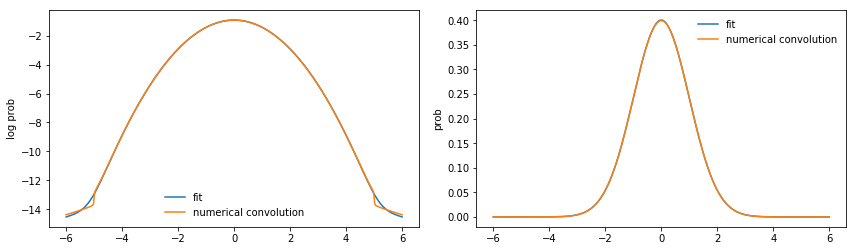

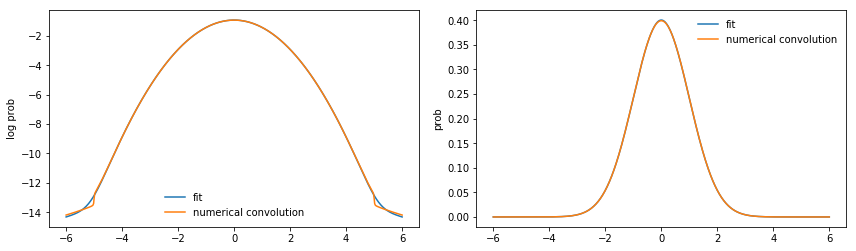

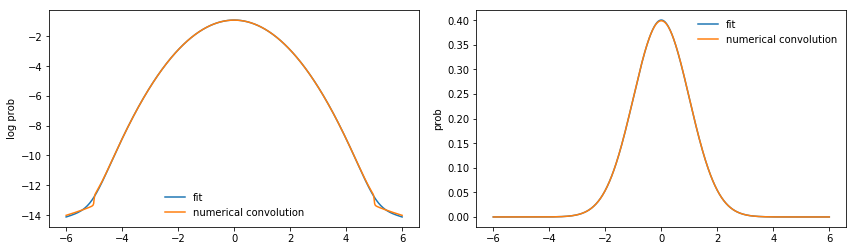

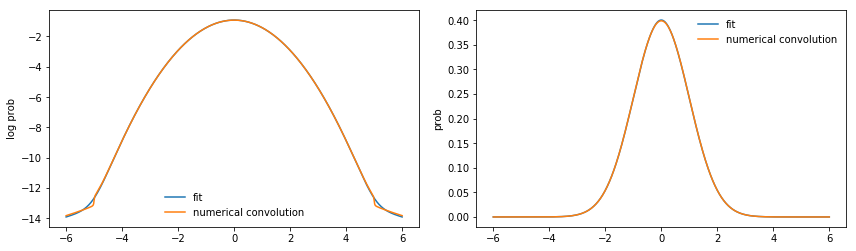

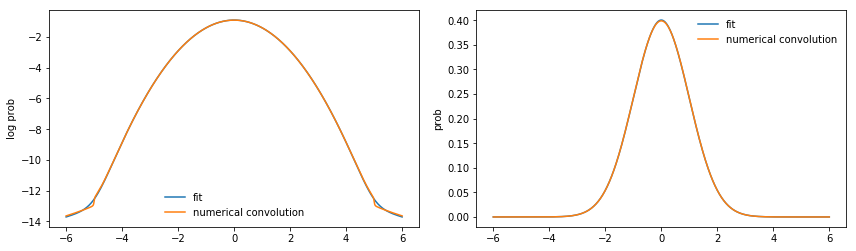

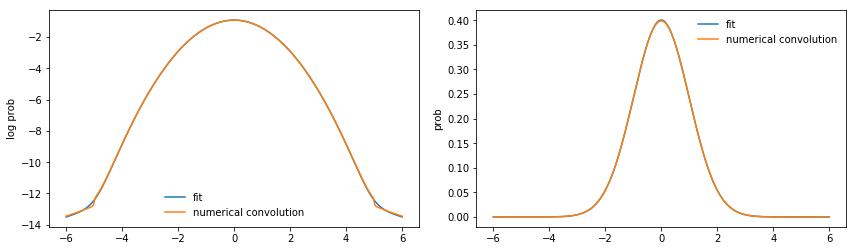

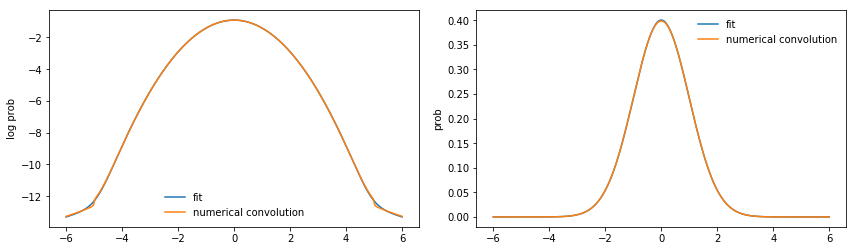

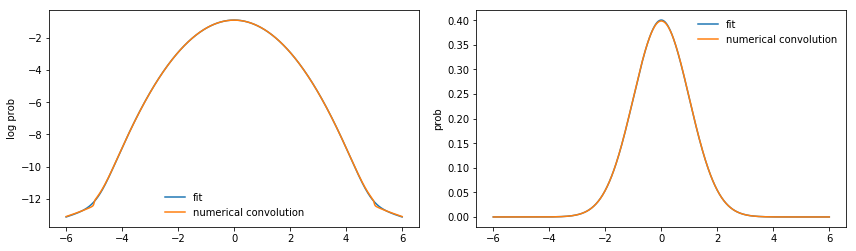

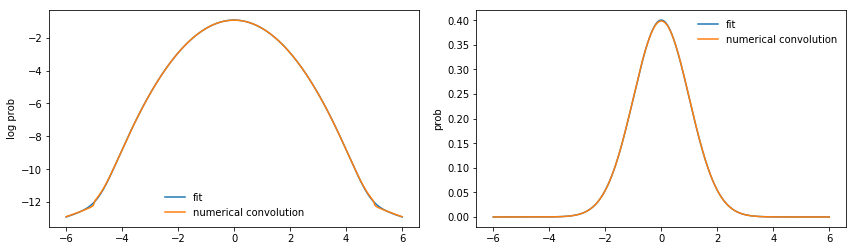

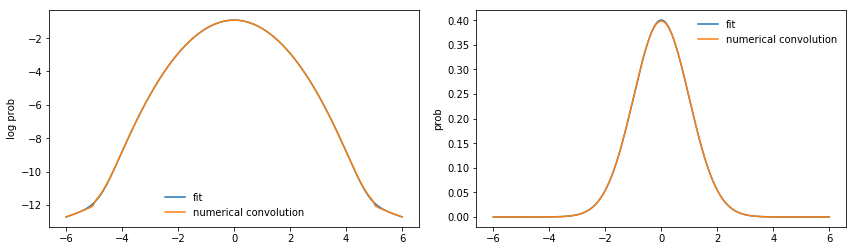

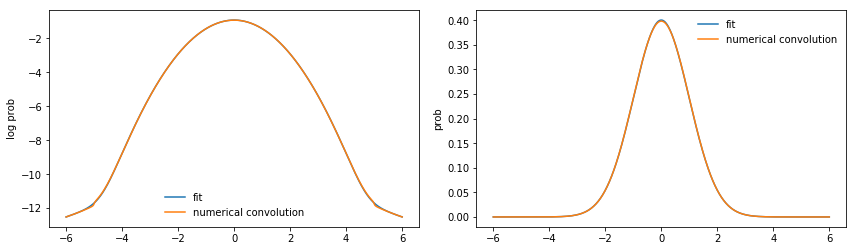

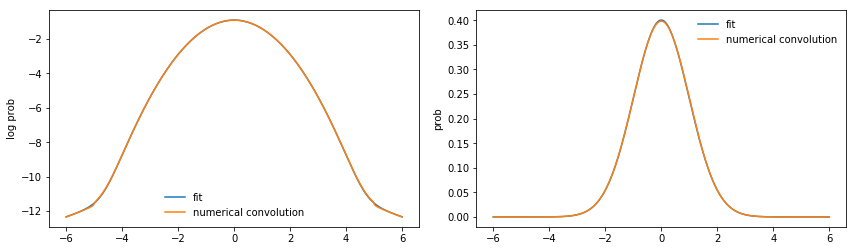

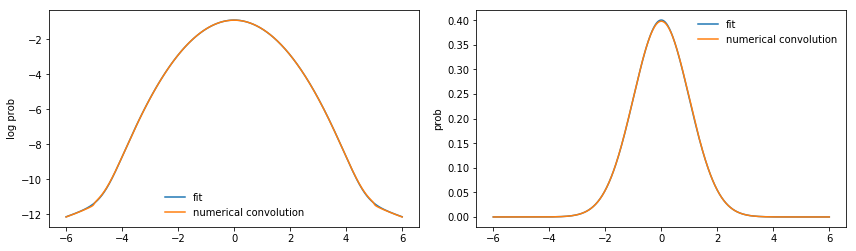

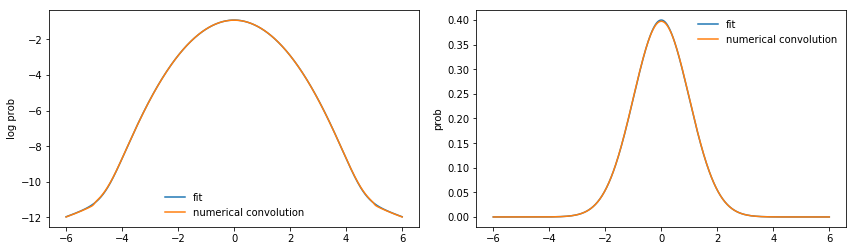

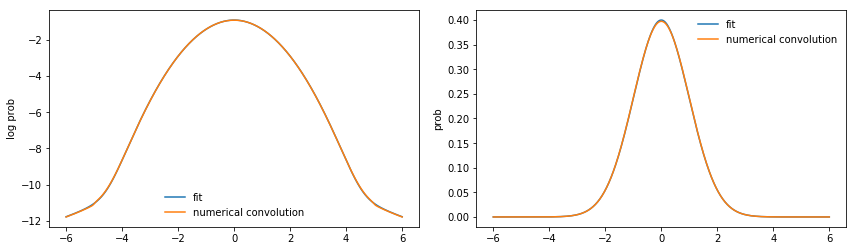

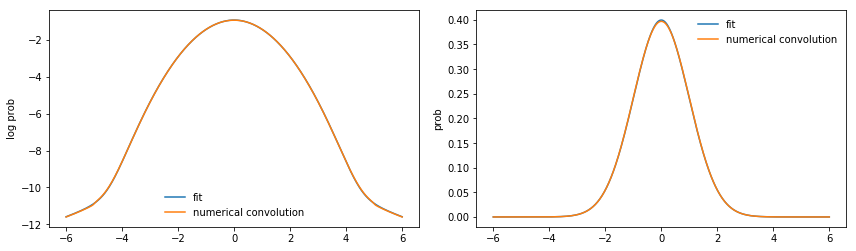

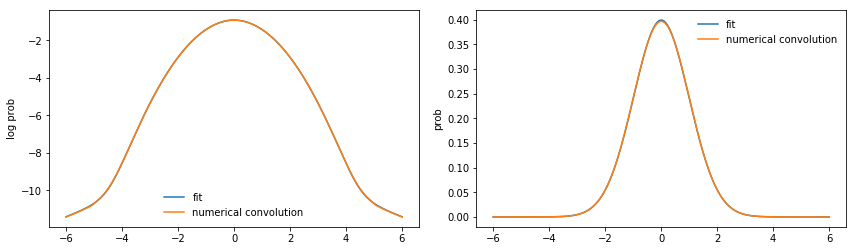

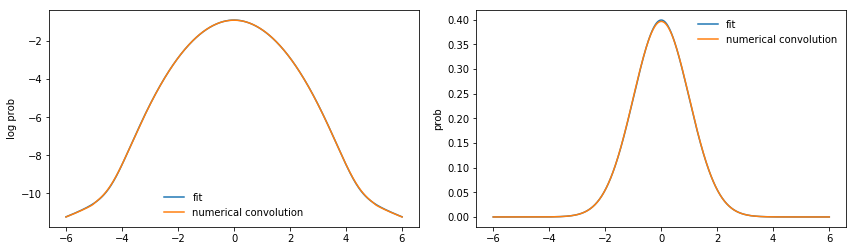

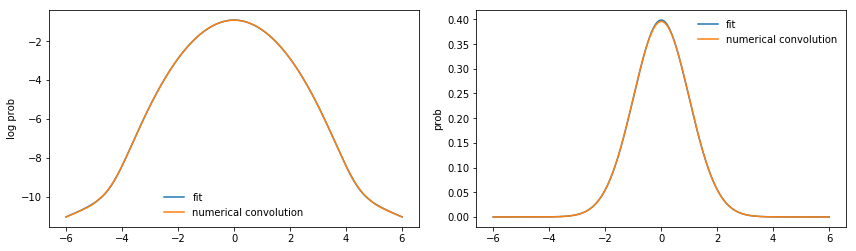

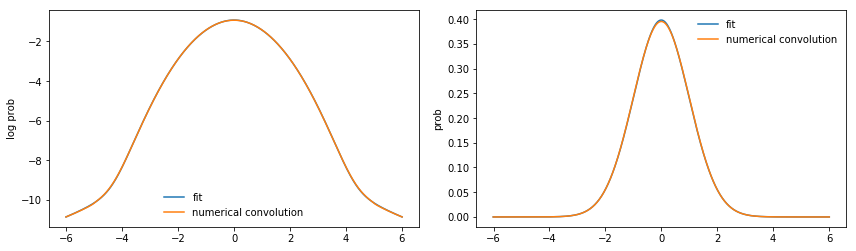

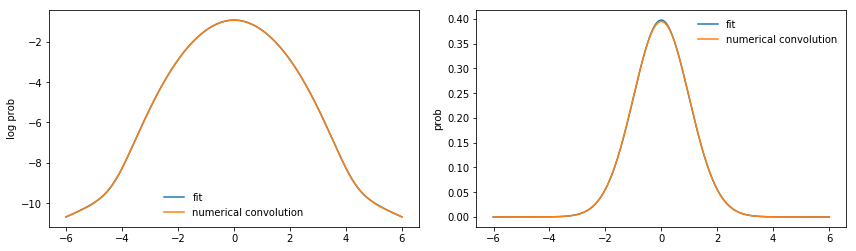

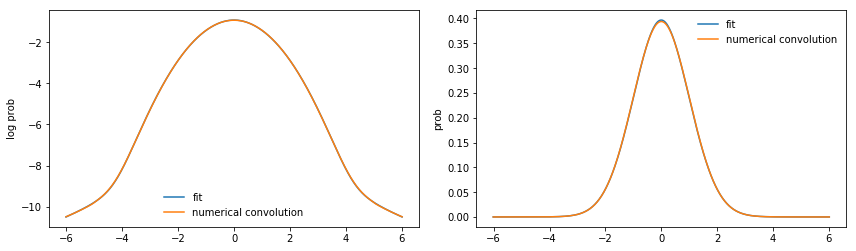

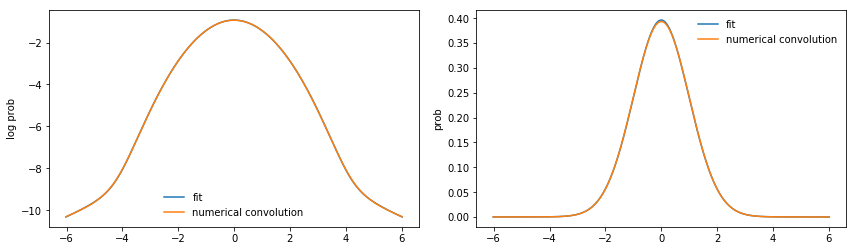

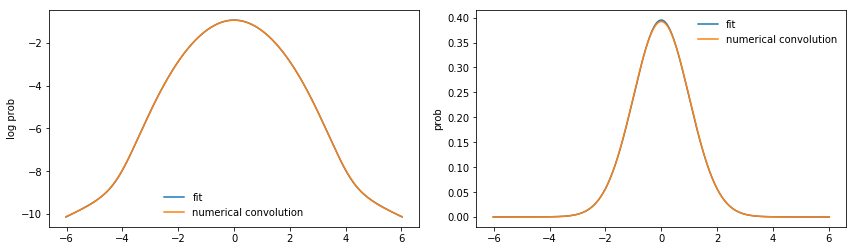

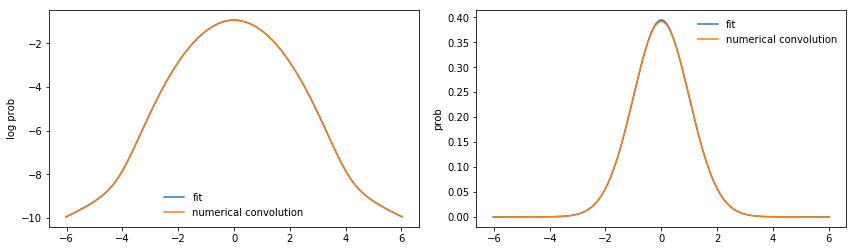

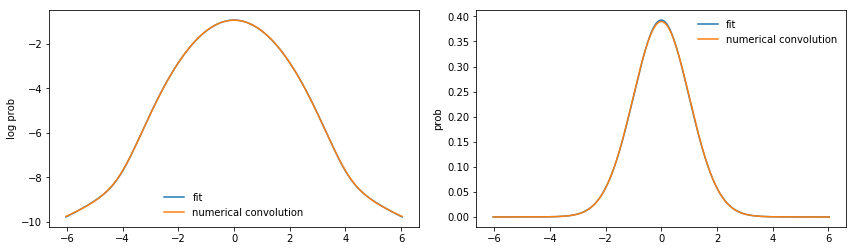

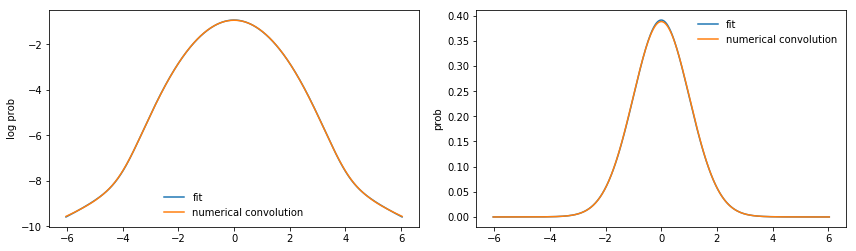

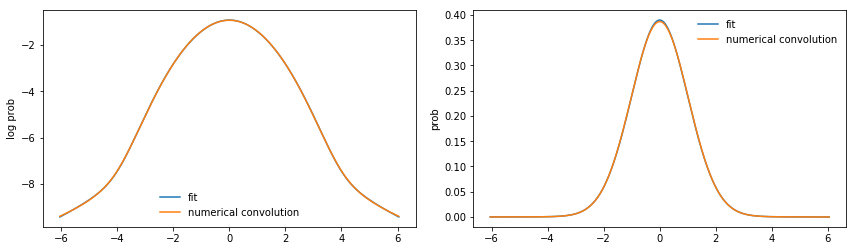

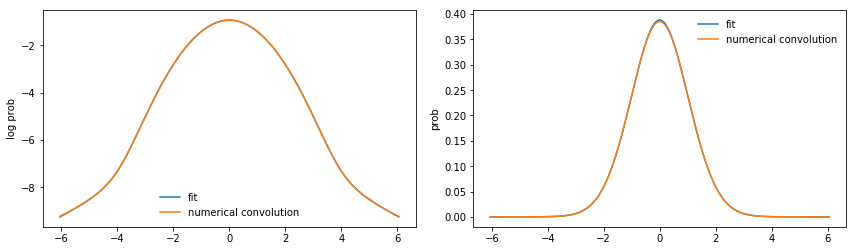

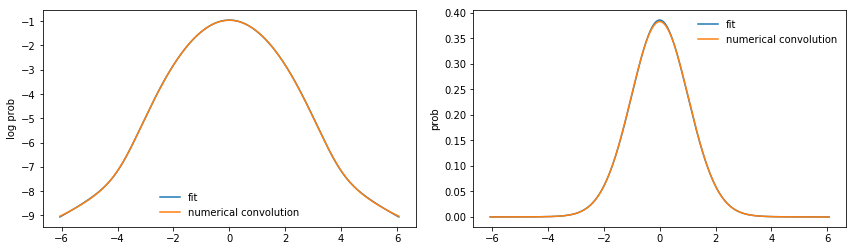

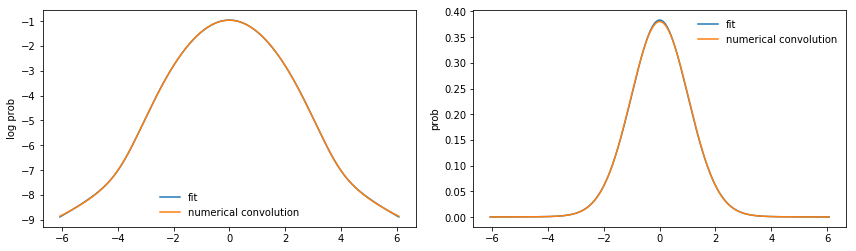

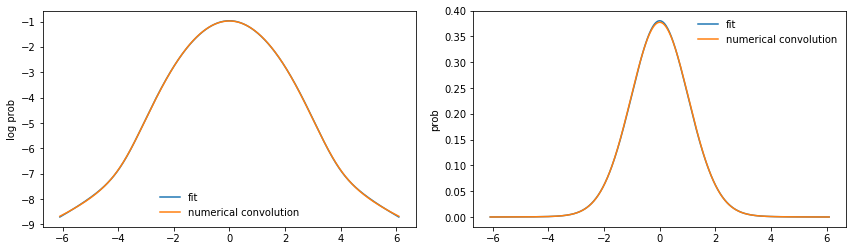

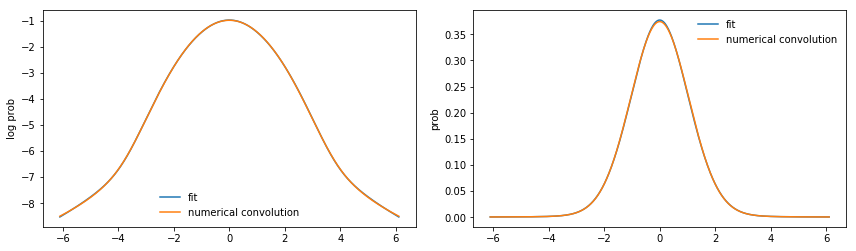

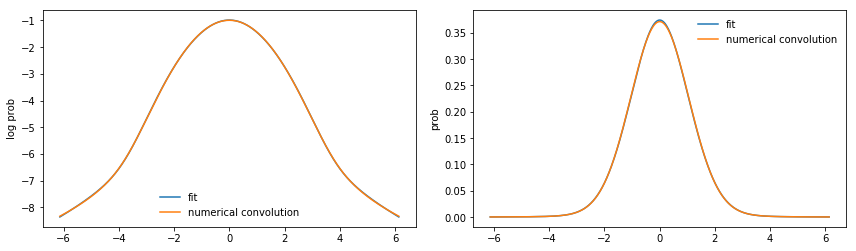

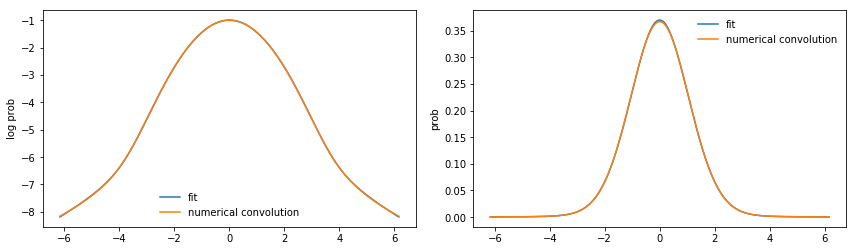

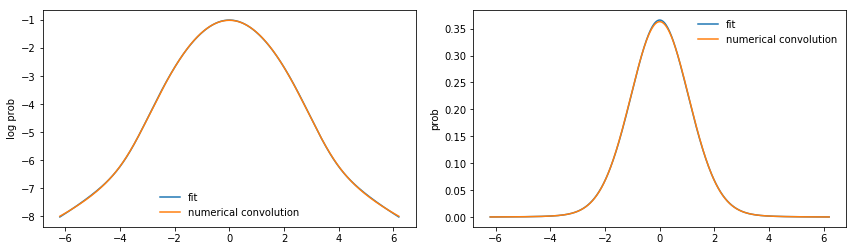

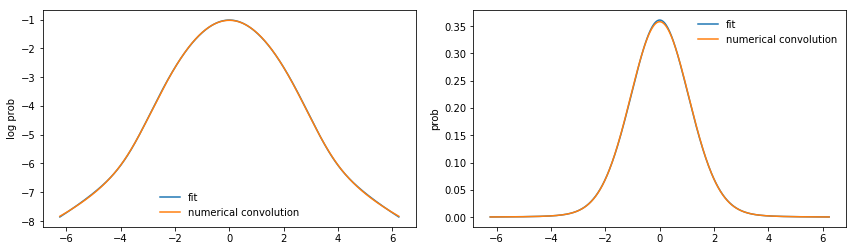

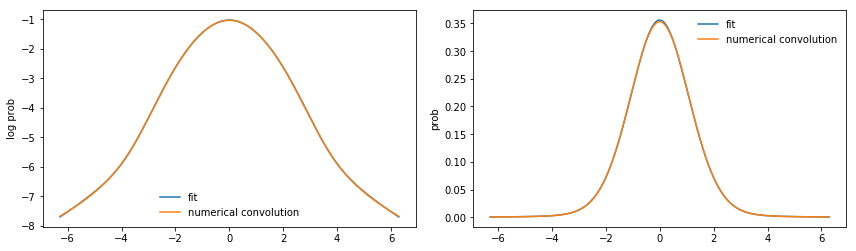

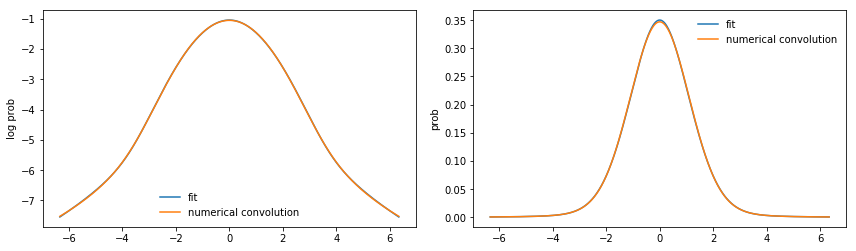

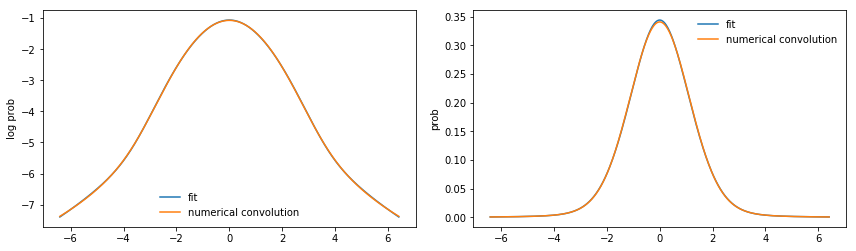

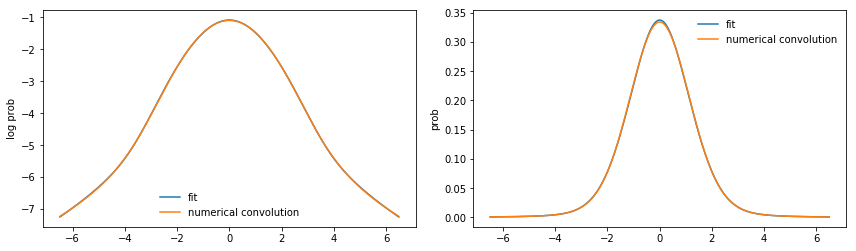

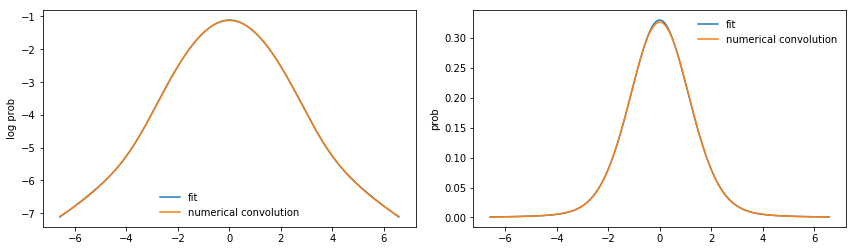

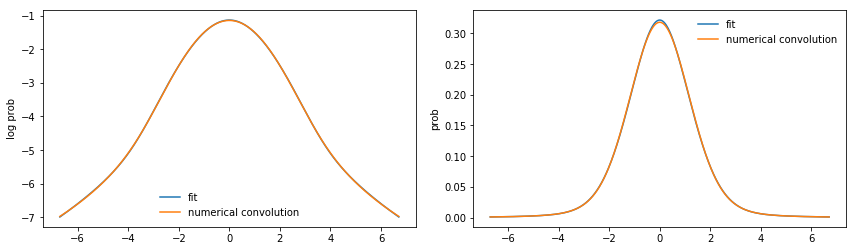

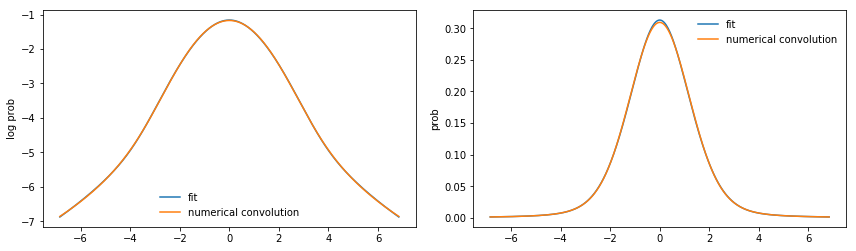

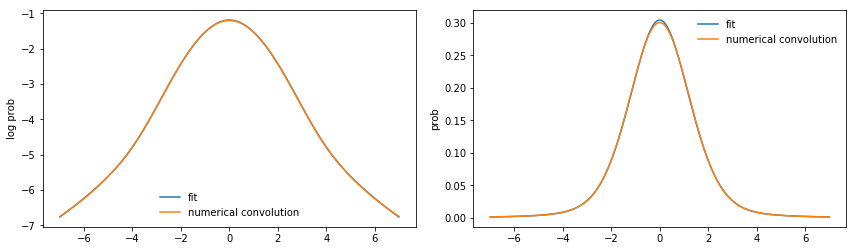

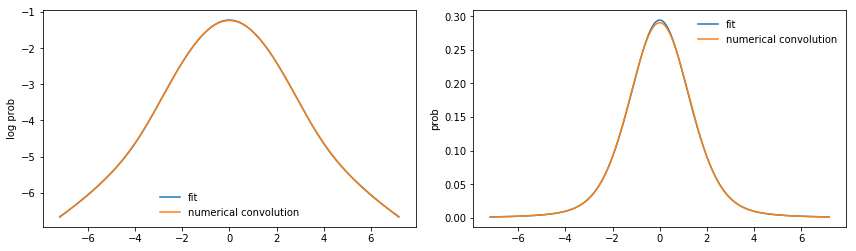

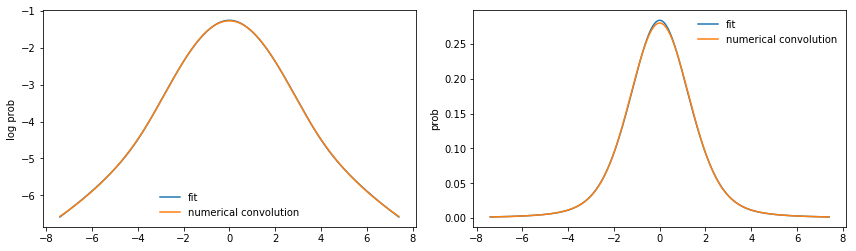

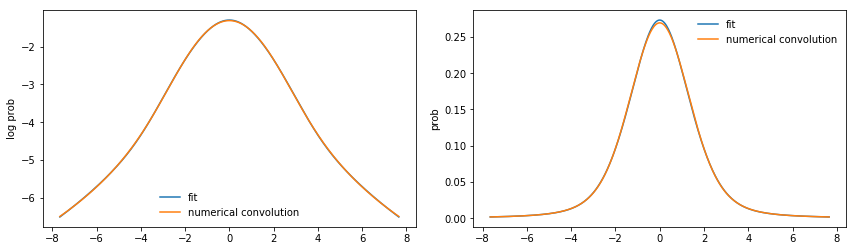

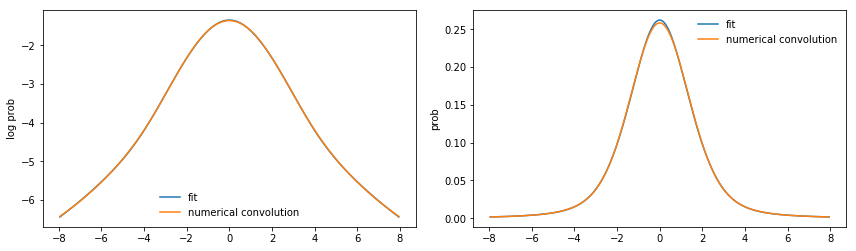

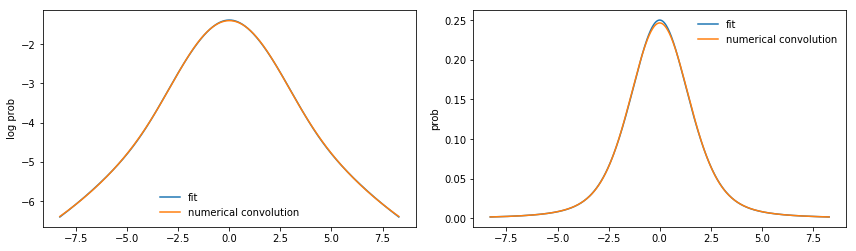

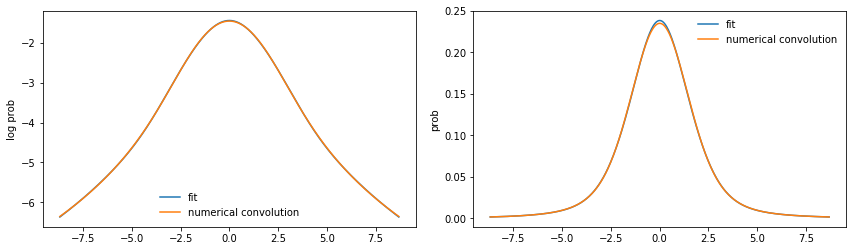

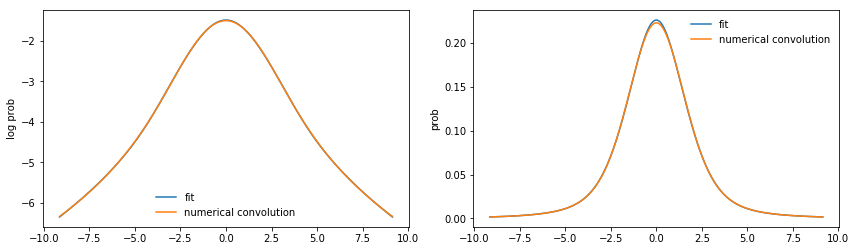

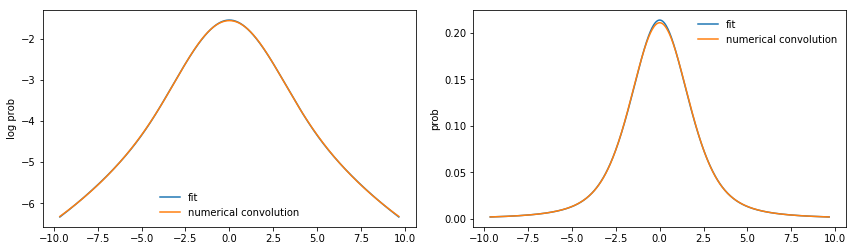

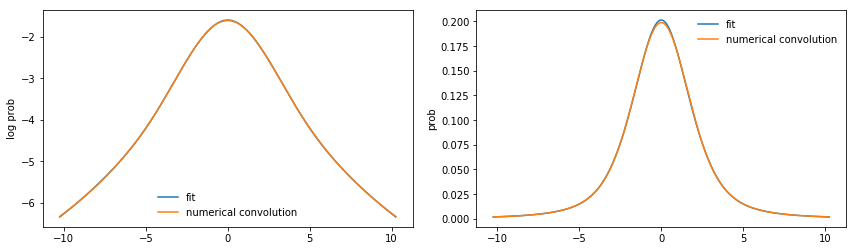

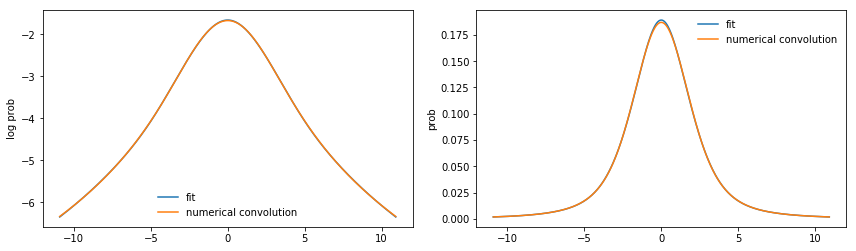

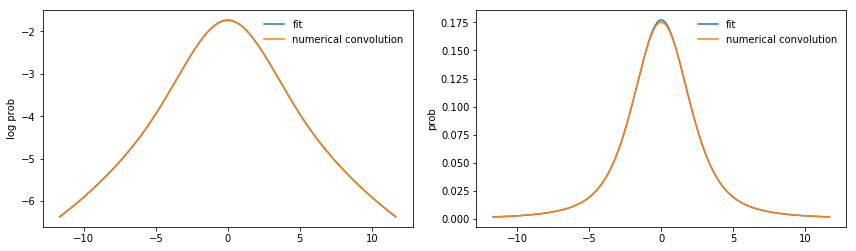

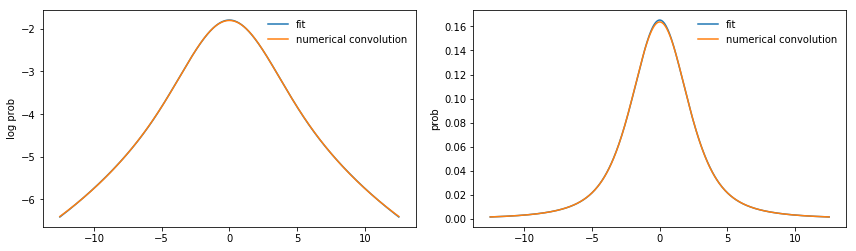

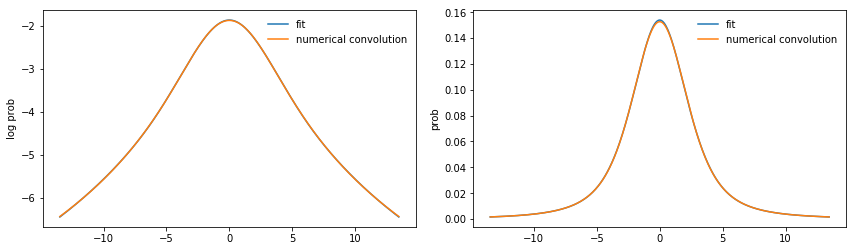

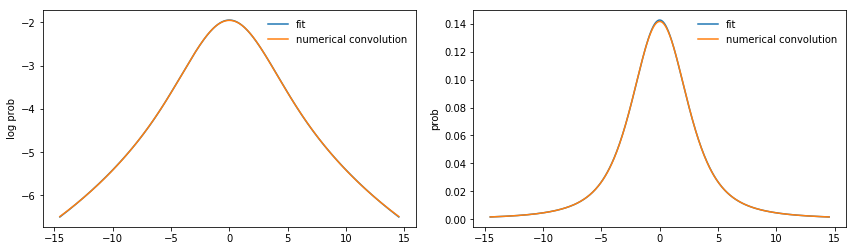

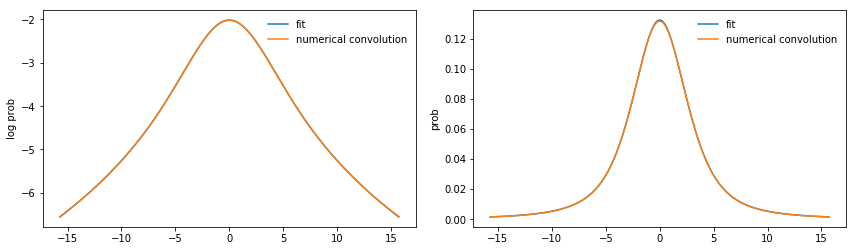

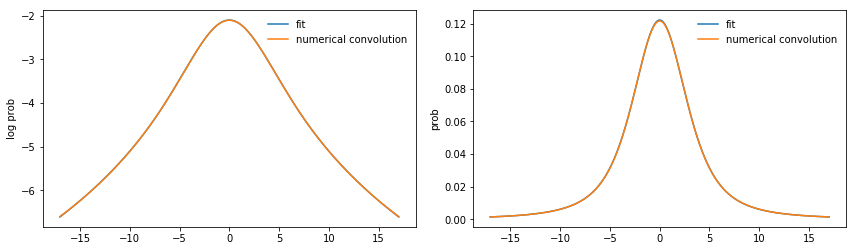

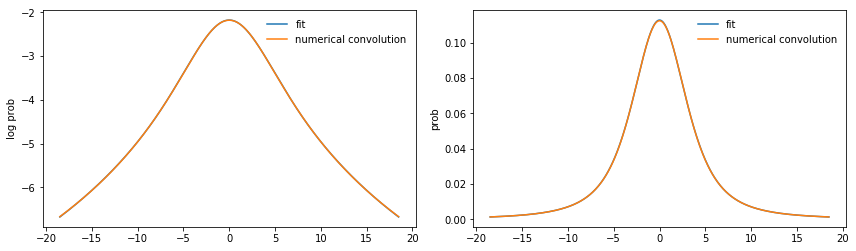

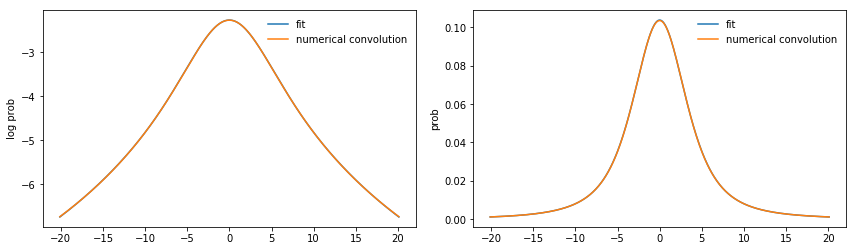

KeyboardInterrupt: 

In [11]:
# plot fit against data

# predictions
log_prob = model.log_prob(x, logr)

# plot against predictions
width = 12
aspect = 1.67*2
plt.rcParams.update({'figure.figsize': [width, width / aspect]})
for i in range(x.shape[-1]):
    plt.subplot(1, 2, 1)
    plt.plot(x[:,i], log_prob[:,i], label = 'fit')
    plt.plot(x[:,i], target_log_prob[:,i], label = 'numerical convolution')
    plt.ylabel('log prob')
    plt.legend(frameon=False)

    plt.subplot(1, 2, 2)
    plt.plot(x[:,i], np.exp(log_prob[:,i]), label = 'fit')
    plt.plot(x[:,i], np.exp(target_log_prob[:,i]), label = 'numerical convolution')
    plt.ylabel('prob')
    plt.legend(frameon=False)
    
    plt.tight_layout()
    plt.show()

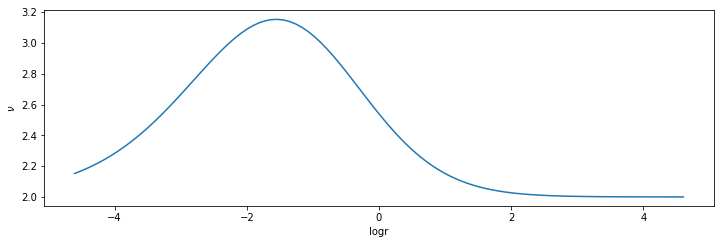

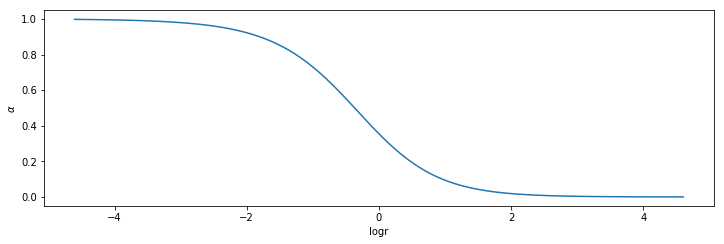

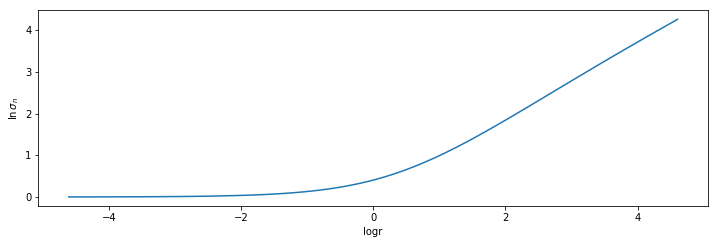

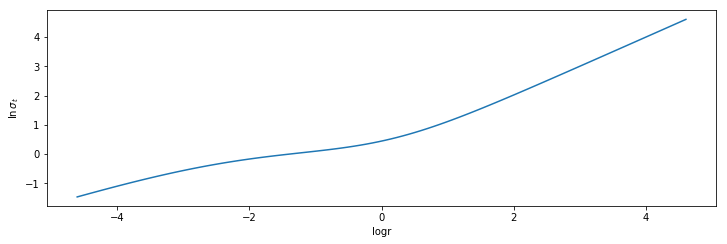

In [17]:
# plot mixture model parameters against

# mixture parameters
alpha, scale_normal, scale_student, df = model(logr)

plt.plot(logr, df)
plt.ylabel(r'$\nu$')
plt.xlabel('logr')
plt.show()

plt.plot(logr, alpha)
plt.ylabel(r'$\alpha$')
plt.xlabel('logr')
plt.show()

plt.plot(logr, np.log(scale_normal))
plt.ylabel(r'$\mathrm{ln}\,\sigma_n$')
plt.xlabel('logr')
plt.show()

plt.plot(logr, np.log(scale_student))
plt.ylabel(r'$\mathrm{ln}\,\sigma_t$')
plt.xlabel('logr')
plt.show()